In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [9]:
nltk.download('stopwords')
df = pd.read_csv('spam.csv', encoding='latin-1')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Preprocessing
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

df['v2'] = df['v2'].apply(clean_text)

In [11]:
# Split the data into features and labels
X = df['v2']
y = df['v1']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Vectorize the messages using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [14]:
# Train the classifiers
naive_bayes = MultinomialNB()
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()

classifiers = [('Naive Bayes', naive_bayes), ('Logistic Regression', logistic_regression), ('Decision Tree', decision_tree)]
ensemble = VotingClassifier(classifiers, voting='hard')

for clf_name, clf in classifiers + [('Ensemble', ensemble)]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    classification_report_result = classification_report(y_test, y_pred)
    print(clf_name)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report_result)
    print()

Naive Bayes
Accuracy: 0.967713004484305
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Logistic Regression
Accuracy: 0.9542600896860987
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      0.99      0.97       965
        spam       0.95      0.69      0.80       150

    accuracy                           0.95      1115
   macro avg       0.95      0.84      0.89      1115
weighted avg       0.95      0.95      0.95      1115


Decision Tree
Accuracy: 0.9560538116591928
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      0.98      0.97       965
        spam       0.86      0.

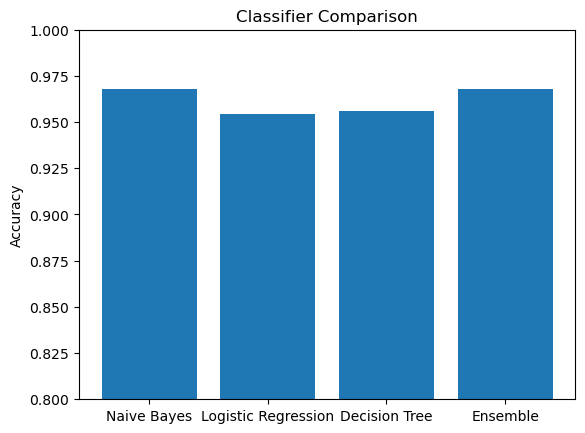

In [15]:
# Comparison Graph
classifiers = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Ensemble']
accuracies = [naive_bayes.score(X_test, y_test), logistic_regression.score(X_test, y_test),
              decision_tree.score(X_test, y_test), ensemble.score(X_test, y_test)]

plt.bar(classifiers, accuracies)
plt.ylim(0.8, 1)
plt.ylabel('Accuracy')
plt.title('Classifier Comparison')
plt.show()